<a href="https://colab.research.google.com/github/JavaFXpert/qiskit4devs-workshop-notebooks/blob/master/quantum_not_gate_qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The quantum version of a NOT gate
In classical programming, a [NOT gate](https://bit.ly/2SmqonO) turns a 0 into a 1, and vice-versa. The quantum version of a NOT gate is the [X gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Pauli-X_gate), often referred to as the Pauli-X gate. It turns a quantum state 0, symbolized in Dirac notation by $\vert0\rangle$, into a $\vert1\rangle$, and vice-versa. It also operates on states that are in some combination, or *superposition*, of $\vert0\rangle$and $\vert1\rangle$. To demonstrate the X gate, we'll create tne following quantum circuit with the [Qiskit](https://qiskit.org/) framework.


In [1]:
# !pip install qiskit
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

/usr/local/lib/python3.6/dist-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


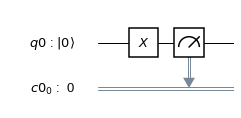

In [2]:
# Create a Quantum Register with 1 qubit (wires).
qr = QuantumRegister(1)

# Create a Classical Register with 1 bit (double wire).
cr = ClassicalRegister(1)

# Create a Quantum Circuit from the quantum and classical registers
circ = QuantumCircuit(qr, cr)

# Place an X gate on the top qubit
circ.x(qr[0])

# Measure all of the qubits into the classical registers
circ.measure(qr, cr)

# Draw the circuit
circ.draw(output='mpl')


In [3]:
# Import Aer
from qiskit import BasicAer

# Use Aer's qasm_simulator
backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator 100 times.
job_sim = execute(circ, backend_sim, shots=100)

# Grab the results from the job.
result_sim = job_sim.result()

# Print the counts, which are contained in a dictionary
counts = result_sim.get_counts(circ)
print(counts)


/usr/local/lib/python3.6/dist-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


{'1': 100}


/usr/local/lib/python3.6/dist-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


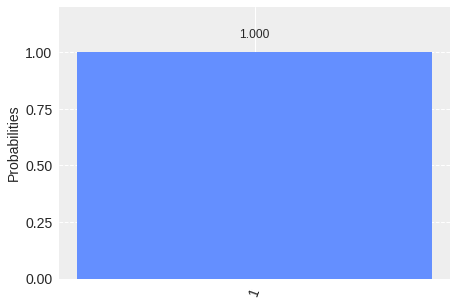

In [4]:
from qiskit.tools.visualization import plot_histogram

# Plot the results on a bar chart
plot_histogram(counts)